# Calculating \\(\pi \\) using a Monte Carlo algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

(-1.1, 1.1)

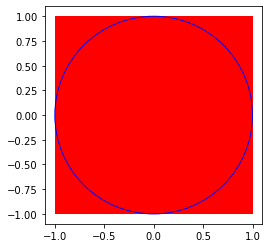

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

rectangle = patches.Rectangle((-1,-1),2,2, facecolor='red')
ax.add_patch(rectangle)

circle = patches.Circle((0,0),1, facecolor='none', edgecolor='blue')
ax.add_patch(circle)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

## Comparing the areas

Area of the circle: \\( A_\mathrm{circle} = \pi r^2 = \pi\\)

Area of the square: \\( A_\mathrm{square} = a^2 = 4 \\)

This means \\( \pi = 4\frac{A_\mathrm{circle}}{A_\mathrm{square}}\\). We can use this ratio to estimate the value of \\( \pi \\). 

### Measure the area ratio by counting randomly generated points

In [3]:
points = 100000

rand = 2*np.random.rand(2*points) - 1

In [4]:
rand_points = rand.reshape(points, 2)

In [5]:
norm_points = rand_points[:,0]**2 + rand_points[:,1]**2

In [6]:
points_out = rand_points[norm_points > 1]
points_in = rand_points[norm_points <= 1]

In [7]:
pi_approx = 4 * len(points_in) / points
print(pi_approx)

3.13992


In [8]:
pi_approx - np.pi

-0.0016726535897930717

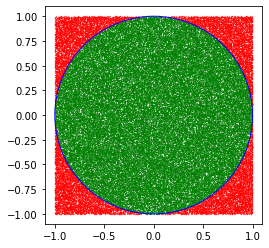

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

circle = patches.Circle((0,0), 1, facecolor='none', edgecolor='blue')
ax.add_patch(circle)

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

plt.scatter(points_in[:,0], points_in[:,1], color='green', s=0.05)
plt.scatter(points_out[:,0], points_out[:,1], color='red', s=0.05)

### Alternative: Loop method

In [10]:
i = 0
counter = 0

while i < points:
    if np.linalg.norm(2*np.random.rand(2)-1) < 1:
        counter = counter + 1
    i = i + 1

In [11]:
pi_approx = 4 * counter / points
print(pi_approx)

3.1404


In [12]:
pi_approx - np.pi

-0.0011926535897930357

### Time comparison

Array/List method

In [13]:
%%timeit

rand = 2*np.random.rand( 2*points ) - 1
rand_points = rand.reshape( points,2 )
norm_points = rand_points[:,0]**2 + rand_points[:,1]**2
points_in = rand_points[norm_points < 1]
pi_approx = 4 * len(points_in) / points

5.34 ms ± 87.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Loop method

In [14]:
%%timeit

i = 0
counter = 0

while i < points:
    if np.linalg.norm(2*np.random.rand(2)-1) < 1:
        counter = counter + 1
    i = i + 1

pi_approx = 4 * counter / points

1.13 s ± 5.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
